# Linear Regression 

Linear Regression is a fundamental statistical and machine learning technique used for modeling the relationship between a dependent variable (also known as the target or response variable) and one or more independent variables (predictors or features).

The primary goal of linear regression is to find the "best-fit" line (or hyperplane in higher dimensions) that minimizes the difference between the predicted values and the actual observed values.

In [4]:
print("This is the program of linear regression")

This is the program of linear regression


## Method 1: By creating our own dataset 

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression


In [6]:
X = np.array([[2, 3], [2, 3], [2, 3], [2, 3], [2, 3]])
Y = np.array([2, 3.5, 4, 5.5, 6])

In [7]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [8]:
X_test = np.array([[6, 7], [2, 3]])

In [9]:
predictions = model.predict(X_test)

In [10]:
print("Predictions:", predictions)

Predictions: [4.2 4.2]


## Method 2:  By loading the CSV file

In [11]:
print("By using the data of used cars we will predict the price using linear regression model.")

By using the data of used cars we will predict the price using linear regression model.


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [13]:
df = pd.read_csv('car data.csv')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [15]:
df.drop('Car_Name', axis=1, inplace=True) #since it doesn't adds any value in our price prediction model

Remove the Year column and replace Year with Age of the car

In [16]:
df.insert(0, "Age", df["Year"].max()+1-df["Year"] )
df.drop('Year', axis=1, inplace=True)

Checking the Null value in our datset

In [17]:
df.isnull().sum()

Age              0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

-> No null value present in the dataset

In [18]:
#Analysing the dataset into categorical and numerical datatype
NumCols = ['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']
CatCols = ['Fuel_Type', 'Seller_Type', 'Transmission']

We can't use the Categorical fields as they are. They have to be converted to numbers because machines can only understand numbers.

In [19]:
CatCols = ['Fuel_Type', 'Seller_Type', 'Transmission']

df1 = pd.get_dummies(df, columns=CatCols, drop_first=True)
df1.head(5)

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5,3.35,5.59,27000,0,0,1,0,1
1,6,4.75,9.54,43000,0,1,0,0,1
2,2,7.25,9.85,6900,0,0,1,0,1
3,8,2.85,4.15,5200,0,0,1,0,1
4,5,4.60,6.87,42450,0,1,0,0,1


Split the input and output (Selling Price) into separate dataframes

In [20]:
X = df1.drop('Selling_Price', axis=1)
y = df1['Selling_Price']

Split original dataset into test and training dataset

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [22]:
y_test_actual = y_test

Train the model

In [23]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

Find the slope and intercept

In [24]:
pd.DataFrame(data = np.append(linear_reg.intercept_ , linear_reg.coef_), index = ['Intercept']+[col+" Coef." for col in X.columns], columns=['Value']).sort_values('Value', ascending=False)

,Value
Intercept,4.320423
Fuel_Type_Diesel Coef.,2.669315
Fuel_Type_Petrol Coef.,0.658316
Present_Price Coef.,0.398445
Kms_Driven Coef.,-0.000006
Age Coef.,-0.365880
Owner Coef.,-0.825707
Transmission_Manual Coef.,-1.328705
Seller_Type_Individual Coef.,-1.379434


In [25]:
y_test_pred = linear_reg.predict(X_test)
df_comp = pd.DataFrame({'Actual':y_test_actual, 'Predicted':y_test_pred})
print(df_comp)

     Actual  Predicted
223    8.25   7.580400
150    0.50  -0.362761
226    5.25   4.311910
296    9.50   8.984633
52    18.00  14.046651
..      ...        ...
240    5.35   6.654371
76     5.50   6.878718
145    0.60  -0.080029
300    5.30   4.870951
135    0.65   1.072400

[91 rows x 2 columns]


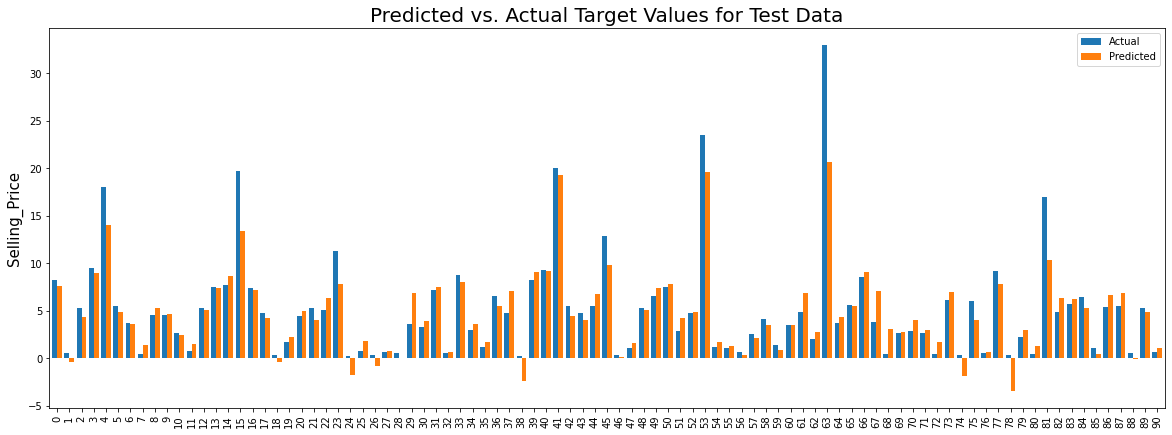

In [26]:
def compare_plot(df_comp):
    df_comp.reset_index(inplace=True)
    df_comp.plot(y=['Actual','Predicted'], kind='bar', figsize=(20,7), width=0.8)
    plt.title('Predicted vs. Actual Target Values for Test Data', fontsize=20)
    plt.ylabel('Selling_Price', fontsize=15)
    plt.show()

compare_plot(df_comp)

Evaluation of the model: Mean Squared Error, Mean Absolute Error, Root Mean Squared Error, and R2-Score.

In [27]:
def model_evaluation(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test, y_pred)
    
    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])

model_evaluation(linear_reg, X_test, y_test, 'Linear Reg.')

,Linear Reg.
MAE,1.242671
MSE,4.432128
RMSE,2.105262
R2-Score,0.851798
